In [119]:
# read json file
import json
with open('./results/iemocap/basic_acoustic_iemocap.json', 'r') as myfile:
    data = myfile.read()
    object = json.loads(data)

voting_y = list()
true_y = list()
p_var = list()

for i in object:
    voting_y.append(i[0])
    true_y.append(i[1])
    p_var.append(i[2])

In [120]:
# !pip install fairlearn
print(len(voting_y), len(true_y), len(p_var))
print(voting_y)
print(true_y)

1336 1336 1336
[3, 0, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 0, 0, 3, 1, 0, 3, 3, 0, 3, 3, 3, 0, 0, 1, 0, 0, 1, 3, 1, 3, 0, 2, 3, 0, 1, 1, 3, 3, 1, 1, 0, 3, 0, 3, 1, 3, 3, 0, 3, 0, 2, 0, 0, 1, 0, 3, 1, 1, 1, 1, 3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 0, 3, 3, 2, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 3, 3, 3, 3, 3, 0, 3, 2, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 2, 0, 3, 3, 3, 0, 0, 0, 3, 1, 3, 0, 0, 0, 3, 0, 0, 0, 0, 1, 3, 0, 1, 3, 1, 1, 3, 3, 2, 1, 1, 1, 1, 3, 1, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 1, 1, 1, 1, 3, 0, 0, 1, 3, 1, 2, 0, 3, 3, 0, 3, 0, 3, 1, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 3, 1, 1, 1, 1, 1, 1, 2, 2, 3, 0, 0, 3, 1, 3, 3, 3, 

In [121]:
from sklearn import metrics
metrics.f1_score(true_y, voting_y, average='micro')

0.6998502994011976

In [122]:
def masker(truth, predicted, mask):
    m_truth = []
    m_predicted = []
    for x, y in zip(truth, predicted):
        if x == mask:
            m_truth.append(1)
        else:
            m_truth.append(0)
        

        if y == mask:
            m_predicted.append(1)
        else:
            m_predicted.append(0)
            
    return m_truth, m_predicted

In [123]:
from fairlearn.metrics import demographic_parity_difference
from fairlearn.metrics import demographic_parity_ratio

# metrics for binary
# diff == 0 means parity has been acheived (no bias)
# ratio == 1 means parity has been acheived (no bias)
avg_diff = 0
avg_ratio = 0

for i in range(4):
    true_y_masked, voting_y_masked = masker(true_y, voting_y, i)
    print("For", i)
    diff = demographic_parity_difference(true_y_masked,
                                        voting_y_masked,
                                        sensitive_features=p_var)
    print(diff)
    avg_diff += diff

    ration = demographic_parity_ratio(true_y_masked,
                                        voting_y_masked,
                                        sensitive_features=p_var)
    print(ration)
    avg_ratio += ration

print("Average Diff:", avg_diff/4)
print("Average Ratio:", avg_ratio/4)


For 0
0.024769217322315823
0.9072203893520034
For 1
0.005206197234866067
0.9792065736944807
For 2
0.007967297102862179
0.7799034175334323
For 3
0.03794271166004404
0.9216704142723631
Average Diff: 0.018971355830022026
Average Ratio: 0.8970001987130698


In [124]:
from fairlearn.metrics import equalized_odds_difference
from fairlearn.metrics import equalized_odds_ratio

avg_diff = 0
avg_ratio = 0

for i in range(4):
    true_y_masked, voting_y_masked = masker(true_y, voting_y, i)
    print("For", i)
    diff = equalized_odds_difference(true_y_masked,
                                    voting_y_masked,
                                    sensitive_features=p_var)
    avg_diff += diff
    print(diff)
    ration = equalized_odds_ratio(true_y_masked,
                                voting_y_masked,
                                sensitive_features=p_var)
    avg_ratio += ration
    print(ration)

print("Average Diff:", avg_diff/4)
print("Average Ratio:", avg_ratio/4)

For 0
0.06793895991901311
0.8826123833757422
For 1
0.0757633668832548
0.9046193327630453
For 2
0.008978675645342299
0.6351351351351352
For 3
0.03684914028798836
0.8943348938383695
Average Diff: 0.04738253568389964
Average Ratio: 0.829175436278073


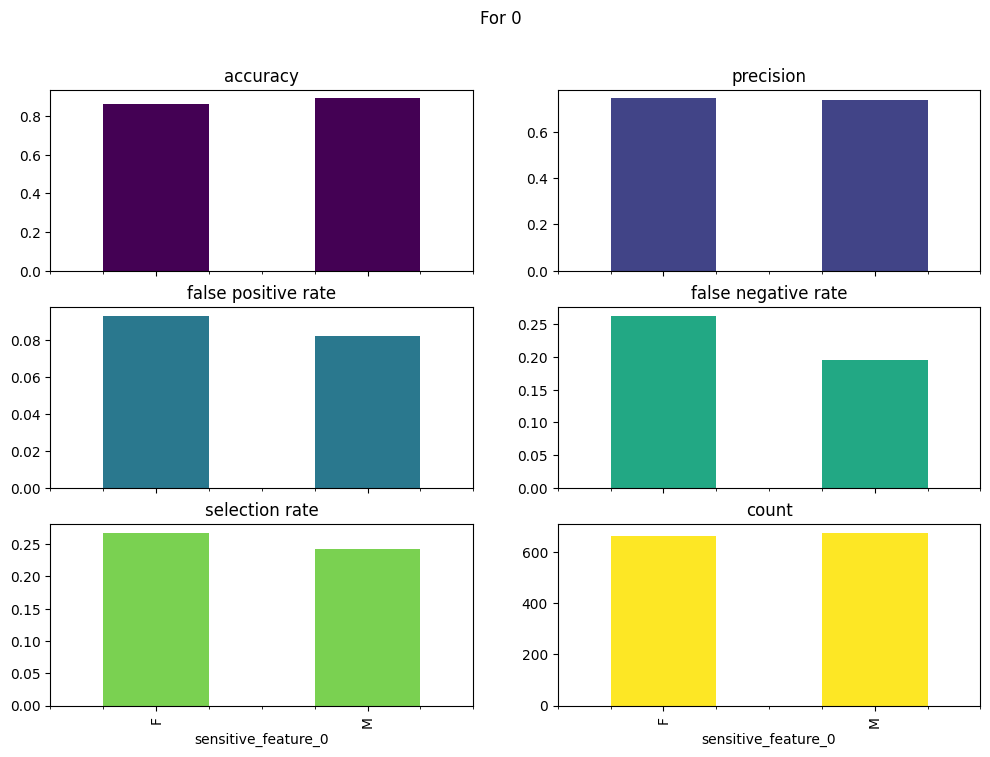

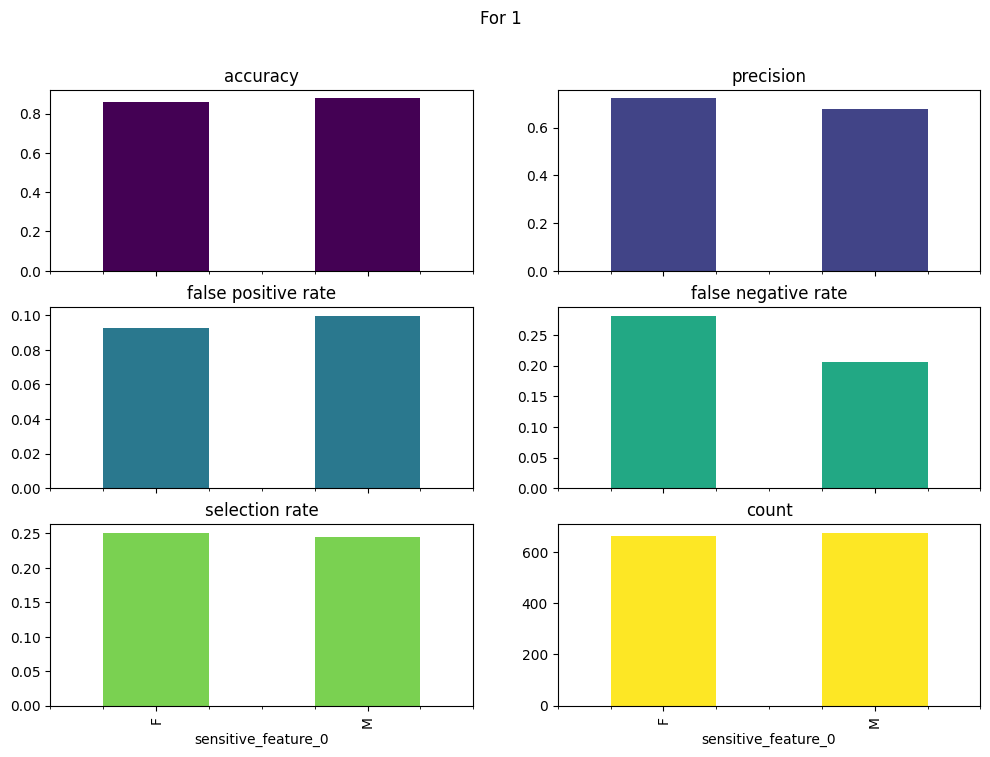

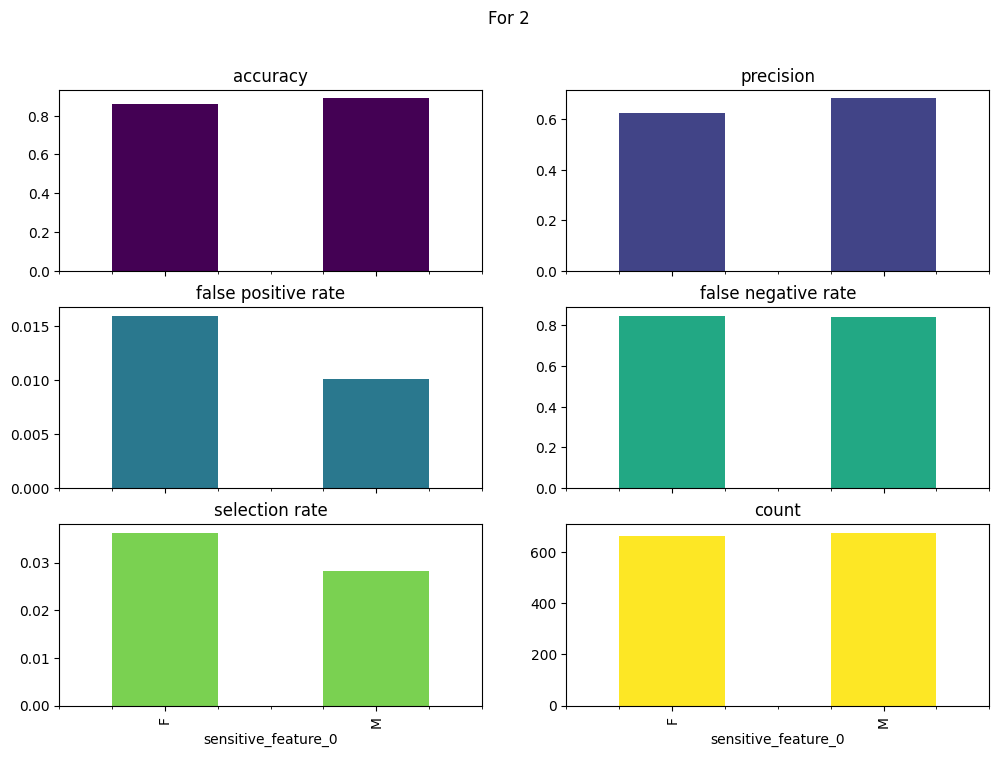

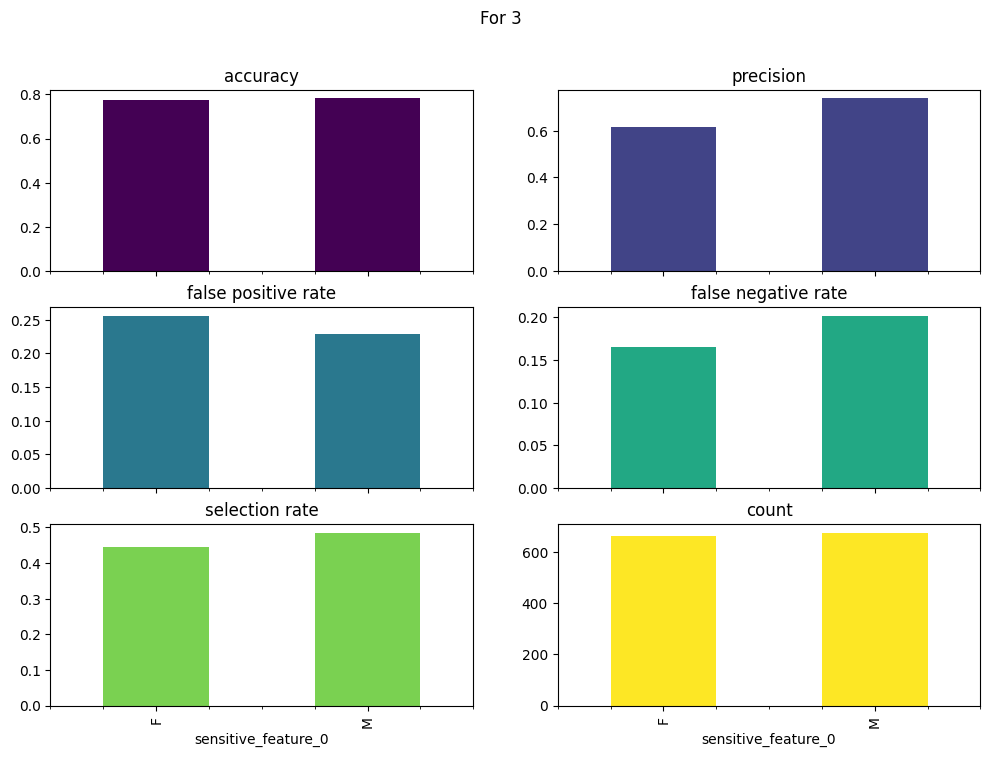

In [125]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)

from sklearn.metrics import accuracy_score, precision_score

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}


for i in range(4):
    true_y_masked, voting_y_masked = masker(true_y, voting_y, i)
    metric_frame = MetricFrame(
        metrics=metrics, y_true=true_y_masked, y_pred=voting_y_masked, sensitive_features=p_var
    )
    metric_frame.by_group.plot.bar(
        subplots=True,
        layout=[3, 2],
        legend=False,
        figsize=[12, 8],
        colormap="viridis",
        title="For " + str(i),
    )
